In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from dowhy import CausalModel
from IPython.display import Image, display
import os 
import sys

DoWhy is a Python Library that sparks causal thinking and analysis via 4-steps:
1. Model a causal inference problem using assumptions that we create.
2. Identify an expression for the causal effect under these assumptions (“causal estimand”).
3. Estimate the expression using statistical methods such as matching or instrumental variables.
4. Verify the validity of the estimate using a variety of robustness checks.

If we make it more simple, the way DoWhy package done Causal Analysis is by Creating Causal Model -> Identify Effect -> Estimate the Effect -> Validate.

In [ ]:
class Causal_Model:
    def __init__(self,df:pd.DataFrame,treatment:str,outcome:str)->None:
        self.df=df
        self.treatment=treatment
        self.outcome=outcome

    def dowhy_model(self):
        labelencoder = LabelEncoder()
        self.df[self.outcome] = labelencoder.fit_transform(self.df[self.outcome])
        cols=list(self.df.columns)
        if self.treatment in cols and self.outcome in cols :
            xs = self.df.drop([self.treatment,self.outcome], axis = 1)
        xs=xs.columns.tolist()
        model=CausalModel(
            data= self.df,
            treatment=self.treatment,
            outcome=self.outcome,
            common_causes=xs
        )
        model.view_model()
        display(Image(filename="causal_model.png"))
        estimands = model.identify_effect() 
        print(estimands)
        estimate = model.estimate_effect(estimands,method_name = "backdoor.propensity_score_weighting")
        print(estimate)
        refutel1 = model.refute_estimate(estimands,estimate, "random_common_cause")
        print(refutel1)
        refutel2 = model.refute_estimate(estimands,estimate, "data_subset_refuter")
        print(refutel2)
        refutel3 = model.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
        print(refutel3)
        return estimands
    
    



In [ ]:
data = pd.read_csv('../data/Univariate_feature_selection_best_5_features.csv')


In [ ]:
labelencoder = LabelEncoder()
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'])
data

,diagnosis,area_mean,area_se,texture_mean,concavity_worst,concavity_mean
0,1,1040.0,53.91,19.98,0.3784,0.11270
1,1,577.9,50.96,20.83,0.2678,0.09366
2,1,797.8,40.51,23.24,0.1459,0.03299
3,1,781.0,54.16,17.89,0.3965,0.09954
4,1,782.7,36.58,23.95,0.2322,0.09938
...,...,...,...,...,...,...
393,0,514.3,16.83,28.92,0.2439,0.06195
394,0,321.4,14.46,27.61,0.2000,0.05999
395,0,657.1,19.54,22.68,0.3662,0.10290
396,0,600.4,29.84,27.15,0.1326,0.04462


# Hypothesis  
benign cells(no cancer) tend to have less concavity than malignant cells(cancer).
does high concaity cause diagnosis ?

In [ ]:
data['High_concavity'] = data['concavity_mean'].apply(lambda x: True if x > 0.04558 else False)
data

,diagnosis,area_mean,area_se,texture_mean,concavity_worst,concavity_mean,High_concavity,ps,ips_weight,tips_weight,cips_weight,ips_normalized_weight,tips_normalized_weight,cips_normalized_weight,ips_stabilized_weight,tips_stabilized_weight,cips_stabilized_weight,d_y,dbar_y
0,1,1040.0,53.91,19.98,0.3784,0.11270,True,0.950000,0.002645,0.005025,0.000264,0.003348,0.005025,0.000456,0.001322,0.002513,0.000132,0.002645,0.000000
1,1,577.9,50.96,20.83,0.2678,0.09366,True,0.912386,0.002754,0.005025,0.000483,0.003486,0.005025,0.000832,0.001377,0.002513,0.000241,0.002754,0.000000
2,1,797.8,40.51,23.24,0.1459,0.03299,False,0.778099,0.011323,0.017621,0.005025,0.015443,0.037776,0.005025,0.005661,0.008810,0.002513,0.000000,0.011323
3,1,781.0,54.16,17.89,0.3965,0.09954,True,0.950000,0.002645,0.005025,0.000264,0.003348,0.005025,0.000456,0.001322,0.002513,0.000132,0.002645,0.000000
4,1,782.7,36.58,23.95,0.2322,0.09938,True,0.847630,0.002964,0.005025,0.000903,0.003753,0.005025,0.001558,0.001482,0.002513,0.000452,0.002964,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,514.3,16.83,28.92,0.2439,0.06195,True,0.533826,0.004707,0.005025,0.004388,0.005959,0.005025,0.007568,0.002353,0.002513,0.002194,0.000000,0.000000
394,0,321.4,14.46,27.61,0.2000,0.05999,True,0.329082,0.007635,0.005025,0.010245,0.009666,0.005025,0.017669,0.003818,0.002513,0.005122,0.000000,0.000000
395,0,657.1,19.54,22.68,0.3662,0.10290,True,0.785034,0.003201,0.005025,0.001376,0.004052,0.005025,0.002373,0.001600,0.002513,0.000688,0.000000,0.000000
396,0,600.4,29.84,27.15,0.1326,0.04462,False,0.567097,0.005804,0.006583,0.005025,0.007916,0.014112,0.005025,0.002902,0.003291,0.002513,0.000000,0.000000


In [ ]:
c=Causal_Model(data,'High_concavity','diagnosis')

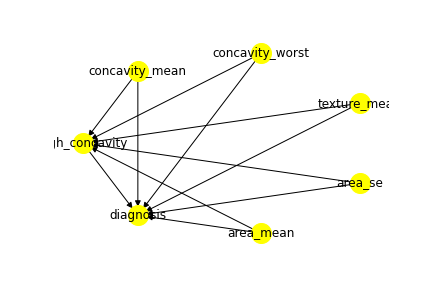

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
─────────────────(Expectation(diagnosis|area_se,texture_mean,concavity_worst,a
d[High_concavity]                                                             

                         
rea_mean,concavity_mean))
                         
Estimand assumption 1, Unconfoundedness: If U→{High_concavity} and U→diagnosis then P(diagnosis|High_concavity,area_se,texture_mean,concavity_worst,area_mean,concavity_mean,U) = P(diagnosis|High_concavity,area_se,texture_mean,concavity_worst,area_mean,concavity_mean)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                       

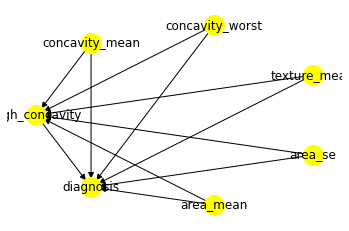

In [ ]:

c.dowhy_model()